## Tarea de Redes Nueronales.
## Alumno: Federico Daniel Moran Fretes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("Dataset\mnist_train_small.csv", header = None)
data_test = pd.read_csv("Dataset\mnist_test.csv", header = None)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\moran\AppData\Local\Temp\ipykernel_22632\2292152679.py:1: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv("Dataset\mnist_train_small.csv", header = None)
C:\Users\moran\AppData\Local\Temp\ipykernel_22632\2292152679.py:2: SyntaxWarning: invalid escape sequence '\m'
  data_test = pd.read_csv("Dataset\mnist_test.csv", header = None)


In [5]:
X = data.iloc[:,1:]
X_test = data_test.iloc[:,1:]

In [6]:
X = X.astype("float32")/255
X_test = X_test.astype("float32")/255

In [7]:
X_test.shape

(10000, 784)

# Etapa 1 - Autoencoder

In [8]:
from tensorflow import keras
from tensorflow.keras import layers, models

In [9]:
#diseño del modelo

## dimension del espacio latente
latent_dim = 32

## Encoder
encoder_input = layers.Input(shape = (784,), name = 'encoder_input')
x = layers.Dense(128, activation='relu', name = 'encoder_dense1')(encoder_input)
x = layers.Dense(64, activation='relu', name = 'encoder_dense2')(x)
latent = layers.Dense(latent_dim, activation='relu', name = 'espacio_latente')(x)

encoder = models.Model(encoder_input, latent, name='encoder')

encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ espacio_latente (Dense)         │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
## decoder
decoder_input = layers.Input(shape = (latent_dim,), name = 'decoder_input')
x = layers.Dense(64, activation='relu', name = 'decoder_dense1')(decoder_input)
x = layers.Dense(128, activation='relu', name = 'decoder_dense2')(x)
decoder_output = layers.Dense(784, activation='sigmoid', name = 'decoder_ouput')(x)

decoder = models.Model(decoder_input, decoder_output, name='decoder')

decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense1 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense2 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_ouput (Dense)           │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
## Autoencoder

autoencoder_input = layers.Input(shape=(784,), name='autoencoder_input')
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = models.Model(autoencoder_input, autoencoder_output, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['mse']
)

In [14]:
history = autoencoder.fit(
    X, X, epochs = 50, batch_size= 128, shuffle = True, validation_split = 0.2
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2989 - mse: 0.0786 - val_loss: 0.2174 - val_mse: 0.0517
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1873 - mse: 0.0417 - val_loss: 0.1699 - val_mse: 0.0361
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1624 - mse: 0.0335 - val_loss: 0.1531 - val_mse: 0.0304
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1473 - mse: 0.0283 - val_loss: 0.1407 - val_mse: 0.0261
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1372 - mse: 0.0248 - val_loss: 0.1327 - val_mse: 0.0233
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1299 - mse: 0.0224 - val_loss: 0.1266 - val_mse: 0.0213
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1252 - mse: 0.0208 - val_loss: 0.1229 - val_mse: 0.0201
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1216 - mse: 0.0196 - val_loss: 0.1196 - val_mse: 0.0190
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

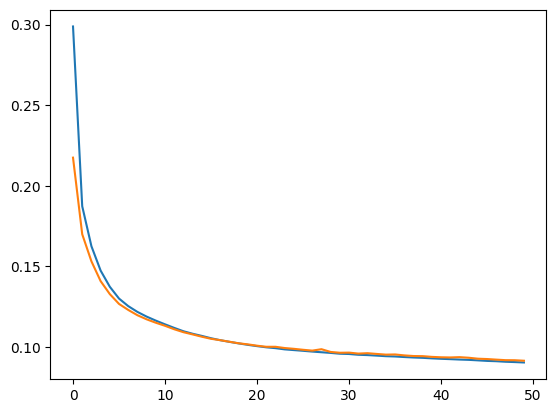

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
X_latent = encoder.predict(X, verbose=0)

In [17]:
X_latent.shape

(20000, 32)

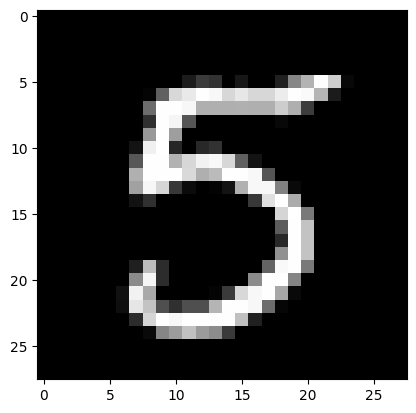

In [18]:
plt.imshow(X.values[1,:].reshape(28,28), cmap='gray')